In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import matplotlib.cm as cm
%matplotlib inline
import cv2


# Loading Inbuild CIFAR DataSet

In [ ]:
import keras 
from keras.datasets import cifar10

# Loading pre shuffeled dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("The cifar10 dataset has training",len(X_train),'examples')
print("The cifar10 dataset has testing",len(X_test),'examples')





The cifar10 dataset has training 50000 examples
The cifar10 dataset has testing 10000 examples


# Visualise First  Training Imaages

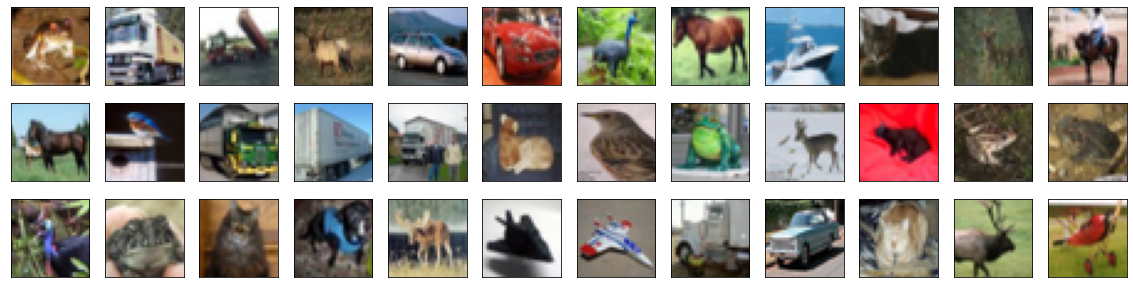

In [ ]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
  ax = fig.add_subplot(3,12,i+1,xticks=[],yticks=[])
  ax.imshow(X_train[i])

# Pre-Process The Images

In [ ]:
# Rescale the images by dividing every pixel in every image by 255
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [ ]:
X_train.shape

(50000, 32, 32, 3)

# One Hot Encoded Labels

In [ ]:
# One hot encoded the labels
from keras.utils import np_utils
from tensorflow import keras
num_classes = len(np.unique(y_train))

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



In [ ]:
# print first one hot encoded labels
print('One hot encoded labels',y_train[:10])

One hot encoded labels [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


# Break Dataset Into Train, Test, Validation

In [ ]:
(X_train, X_valid) = X_train[5000:] , X_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_valid.shape[0], 'validation samples')


45000 train samples
10000 test samples
5000 validation samples


# Define The Model Architecture

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(16,kernel_size=(3,3),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

# Get model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 4, 4, 64)        

# Compile Model

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Train The Model

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5',verbose=1,save_best_only=True)

model.fit(X_train,y_train,batch_size=32,epochs=10,validation_data=(X_valid, y_valid),callbacks=[checkpointer],verbose=2,shuffle=True)

Epoch 1/10

Epoch 1: val_loss improved from inf to 1.30639, saving model to model.weights.best.hdf5
1407/1407 - 8s - loss: 1.6924 - accuracy: 0.3644 - val_loss: 1.3064 - val_accuracy: 0.5248 - 8s/epoch - 6ms/step
Epoch 2/10

Epoch 2: val_loss improved from 1.30639 to 1.14291, saving model to model.weights.best.hdf5
1407/1407 - 6s - loss: 1.2805 - accuracy: 0.5399 - val_loss: 1.1429 - val_accuracy: 0.5864 - 6s/epoch - 4ms/step
Epoch 3/10

Epoch 3: val_loss improved from 1.14291 to 0.99883, saving model to model.weights.best.hdf5
1407/1407 - 7s - loss: 1.1141 - accuracy: 0.6093 - val_loss: 0.9988 - val_accuracy: 0.6462 - 7s/epoch - 5ms/step
Epoch 4/10

Epoch 4: val_loss improved from 0.99883 to 0.95754, saving model to model.weights.best.hdf5
1407/1407 - 6s - loss: 0.9971 - accuracy: 0.6526 - val_loss: 0.9575 - val_accuracy: 0.6668 - 6s/epoch - 4ms/step
Epoch 5/10

Epoch 5: val_loss improved from 0.95754 to 0.89288, saving model to model.weights.best.hdf5
1407/1407 - 6s - loss: 0.9145 - 

# Loading Model with Best Validation Accuracy

In [ ]:
model.load_weights('model.weights.best.hdf5')

# Visualise Some Prediction 

In [ ]:
y_hat = model.predict(X_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

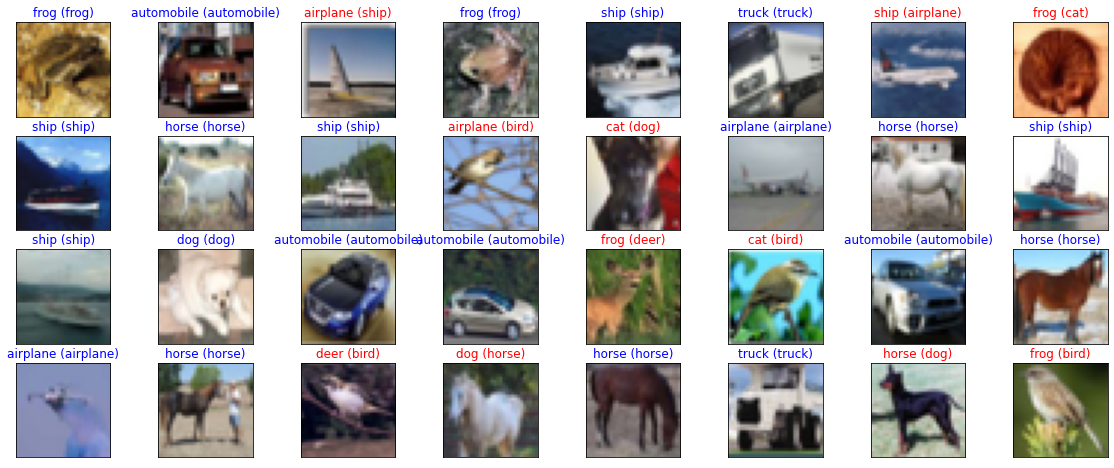

In [ ]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

# Model Evaluation

In [ ]:
model.evaluate(X_test,y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.8871 - accuracy: 0.7015


[0.8870533108711243, 0.7014999985694885]